In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitter_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_user = ("@FoxNews", "@CBSNews", "@BBCNews", "@CNN", "@nytimes" )

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Fri Apr 06 23:46:37 +0000 2018,0.000,1.000,0.000,1
1,-0.5994,Fri Apr 06 23:43:05 +0000 2018,0.157,0.843,0.000,2
2,0.1779,Fri Apr 06 23:35:00 +0000 2018,0.146,0.662,0.192,3
3,0.0000,Fri Apr 06 23:27:12 +0000 2018,0.000,1.000,0.000,4
4,-0.4767,Fri Apr 06 23:17:23 +0000 2018,0.140,0.860,0.000,5


In [4]:
sentiments_pd.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
95,0.0000,Fri Apr 06 14:05:04 +0000 2018,0.0,1.000,0.000,96
96,0.7003,Fri Apr 06 14:01:41 +0000 2018,0.0,0.721,0.279,97
97,0.0000,Fri Apr 06 13:54:00 +0000 2018,0.0,1.000,0.000,98
98,0.0000,Fri Apr 06 13:46:34 +0000 2018,0.0,1.000,0.000,99
99,0.0000,Fri Apr 06 13:45:31 +0000 2018,0.0,1.000,0.000,100


In [5]:
sentiments_pd['Compound'].mean()

-0.08960099999999996

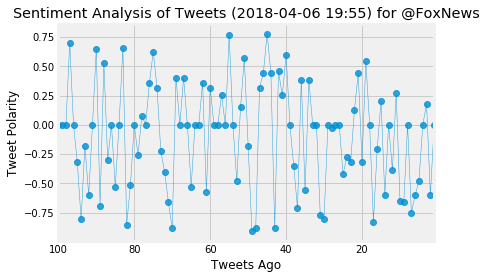

In [6]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

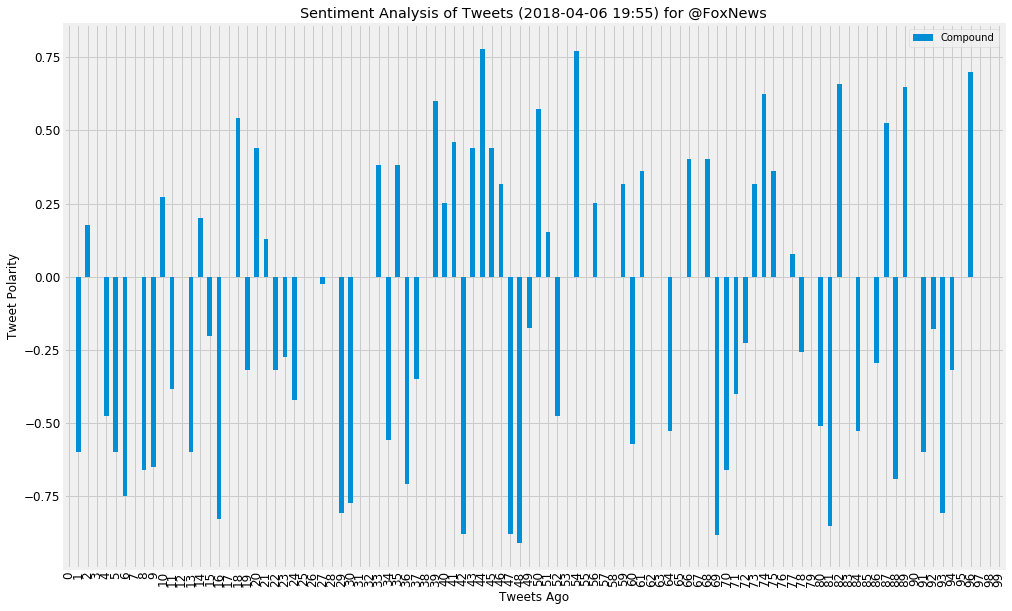

In [7]:
ax = sentiments_pd[['Compound']].plot(kind='bar', title =(f"Sentiment Analysis of Tweets ({now}) for {target_user}"), figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Tweets Ago", fontsize=12)
ax.set_ylabel("Tweet Polarity", fontsize=12)
plt.show()